In [18]:
# import required libraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

from sklearn import metrics
import matplotlib.pyplot as plt
import graphviz

In [2]:
# Load the dataset
data = pd.read_csv("parkinsons.data")  # Replace with your actual dataset filename

# Separate features and target
X = data.drop(['name', 'status'], axis=1)  # Remove 'name' and 'status' columns
y = data['status']

In [3]:
# Train-Test Split

# First, split the data into train_val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)

# Next, split the train_val set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=7,stratify=y_train_val)

# Now you have X_train, X_val, X_test, y_train, y_val, and y_test

In [4]:
# Analysis of train-test split

train_status_counts = y_train.value_counts()
test_status_counts = y_test.value_counts()

print("Train set status distribution:")
print(train_status_counts)

print("\nTest set status distribution:")
print(test_status_counts)

# status explanation:
# 0 = healthy 
# 1 = non-healthy (PD - Parkinson's disease)

Train set status distribution:
1    77
0    25
Name: status, dtype: int64

Test set status distribution:
1    44
0    15
Name: status, dtype: int64


In [5]:
# Scale the numerical features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [6]:
# Create an XGBoost classifier
model = xgb.XGBClassifier(random_state=7)

# Define hyperparameter distribution for random search
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': range(100, 1000, 100),
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# Perform random search using cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, scoring='accuracy', cv=3, random_state=7, verbose=2, error_score='raise')
random_search.fit(X_train_scaled, y_train, eval_set=[(X_val_scaled, y_val)])

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[0]	validation_0-logloss:0.65552
[1]	validation_0-logloss:0.61950
[2]	validation_0-logloss:0.59332
[3]	validation_0-logloss:0.57312
[4]	validation_0-logloss:0.56536
[5]	validation_0-logloss:0.54816
[6]	validation_0-logloss:0.54241
[7]	validation_0-logloss:0.52584
[8]	validation_0-logloss:0.51956
[9]	validation_0-logloss:0.50924
[10]	validation_0-logloss:0.50463
[11]	validation_0-logloss:0.49874
[12]	validation_0-logloss:0.50158
[13]	validation_0-logloss:0.50527
[14]	validation_0-logloss:0.50330
[15]	validation_0-logloss:0.50184
[16]	validation_0-logloss:0.50775
[17]	validation_0-logloss:0.50606
[18]	validation_0-logloss:0.49994
[19]	validation_0-logloss:0.50174
[20]	validation_0-logloss:0.50514
[21]	validation_0-logloss:0.50948
[22]	validation_0-logloss:0.51556
[23]	validation_0-logloss:0.51954
[24]	validation_0-logloss:0.52352
[25]	validation_0-logloss:0.52312
[26]	validation_0-logloss:0.52664
[27]	validation_0-logloss:0.5308

[236]	validation_0-logloss:0.65807
[237]	validation_0-logloss:0.65723
[238]	validation_0-logloss:0.65826
[239]	validation_0-logloss:0.65854
[240]	validation_0-logloss:0.65917
[241]	validation_0-logloss:0.65921
[242]	validation_0-logloss:0.65933
[243]	validation_0-logloss:0.65883
[244]	validation_0-logloss:0.66010
[245]	validation_0-logloss:0.65964
[246]	validation_0-logloss:0.65988
[247]	validation_0-logloss:0.66011
[248]	validation_0-logloss:0.65955
[249]	validation_0-logloss:0.65931
[250]	validation_0-logloss:0.65953
[251]	validation_0-logloss:0.65988
[252]	validation_0-logloss:0.65902
[253]	validation_0-logloss:0.65971
[254]	validation_0-logloss:0.65808
[255]	validation_0-logloss:0.65894
[256]	validation_0-logloss:0.66004
[257]	validation_0-logloss:0.65985
[258]	validation_0-logloss:0.65978
[259]	validation_0-logloss:0.65939
[260]	validation_0-logloss:0.66062
[261]	validation_0-logloss:0.66041
[262]	validation_0-logloss:0.66056
[263]	validation_0-logloss:0.66194
[264]	validation_0-l

[471]	validation_0-logloss:0.66001
[472]	validation_0-logloss:0.65998
[473]	validation_0-logloss:0.66030
[474]	validation_0-logloss:0.65980
[475]	validation_0-logloss:0.65987
[476]	validation_0-logloss:0.66016
[477]	validation_0-logloss:0.66013
[478]	validation_0-logloss:0.66030
[479]	validation_0-logloss:0.66003
[480]	validation_0-logloss:0.65986
[481]	validation_0-logloss:0.65953
[482]	validation_0-logloss:0.65989
[483]	validation_0-logloss:0.66099
[484]	validation_0-logloss:0.66098
[485]	validation_0-logloss:0.66123
[486]	validation_0-logloss:0.66184
[487]	validation_0-logloss:0.66128
[488]	validation_0-logloss:0.66036
[489]	validation_0-logloss:0.65978
[490]	validation_0-logloss:0.65983
[491]	validation_0-logloss:0.65970
[492]	validation_0-logloss:0.65997
[493]	validation_0-logloss:0.66030
[494]	validation_0-logloss:0.65977
[495]	validation_0-logloss:0.65979
[496]	validation_0-logloss:0.65985
[497]	validation_0-logloss:0.66009
[498]	validation_0-logloss:0.66046
[499]	validation_0-l

[205]	validation_0-logloss:0.56028
[206]	validation_0-logloss:0.56194
[207]	validation_0-logloss:0.56222
[208]	validation_0-logloss:0.56214
[209]	validation_0-logloss:0.56348
[210]	validation_0-logloss:0.56356
[211]	validation_0-logloss:0.56342
[212]	validation_0-logloss:0.56354
[213]	validation_0-logloss:0.56379
[214]	validation_0-logloss:0.56349
[215]	validation_0-logloss:0.56322
[216]	validation_0-logloss:0.56298
[217]	validation_0-logloss:0.56301
[218]	validation_0-logloss:0.56268
[219]	validation_0-logloss:0.56279
[220]	validation_0-logloss:0.56253
[221]	validation_0-logloss:0.56404
[222]	validation_0-logloss:0.56389
[223]	validation_0-logloss:0.56234
[224]	validation_0-logloss:0.56236
[225]	validation_0-logloss:0.56254
[226]	validation_0-logloss:0.56240
[227]	validation_0-logloss:0.56217
[228]	validation_0-logloss:0.56357
[229]	validation_0-logloss:0.56223
[230]	validation_0-logloss:0.56189
[231]	validation_0-logloss:0.56232
[232]	validation_0-logloss:0.56230
[233]	validation_0-l

[440]	validation_0-logloss:0.57834
[441]	validation_0-logloss:0.57838
[442]	validation_0-logloss:0.57722
[443]	validation_0-logloss:0.57738
[444]	validation_0-logloss:0.57762
[445]	validation_0-logloss:0.57751
[446]	validation_0-logloss:0.57762
[447]	validation_0-logloss:0.57756
[448]	validation_0-logloss:0.57735
[449]	validation_0-logloss:0.57742
[450]	validation_0-logloss:0.57800
[451]	validation_0-logloss:0.57832
[452]	validation_0-logloss:0.57817
[453]	validation_0-logloss:0.57797
[454]	validation_0-logloss:0.57785
[455]	validation_0-logloss:0.57800
[456]	validation_0-logloss:0.57791
[457]	validation_0-logloss:0.57817
[458]	validation_0-logloss:0.57818
[459]	validation_0-logloss:0.57824
[460]	validation_0-logloss:0.57870
[461]	validation_0-logloss:0.57873
[462]	validation_0-logloss:0.57889
[463]	validation_0-logloss:0.57900
[464]	validation_0-logloss:0.57866
[465]	validation_0-logloss:0.57842
[466]	validation_0-logloss:0.57848
[467]	validation_0-logloss:0.57922
[468]	validation_0-l

[174]	validation_0-logloss:0.39503
[175]	validation_0-logloss:0.39517
[176]	validation_0-logloss:0.39593
[177]	validation_0-logloss:0.39754
[178]	validation_0-logloss:0.39848
[179]	validation_0-logloss:0.39684
[180]	validation_0-logloss:0.39527
[181]	validation_0-logloss:0.39691
[182]	validation_0-logloss:0.39821
[183]	validation_0-logloss:0.39912
[184]	validation_0-logloss:0.39988
[185]	validation_0-logloss:0.40056
[186]	validation_0-logloss:0.39854
[187]	validation_0-logloss:0.39796
[188]	validation_0-logloss:0.39890
[189]	validation_0-logloss:0.39964
[190]	validation_0-logloss:0.40076
[191]	validation_0-logloss:0.40019
[192]	validation_0-logloss:0.40199
[193]	validation_0-logloss:0.40187
[194]	validation_0-logloss:0.40210
[195]	validation_0-logloss:0.40068
[196]	validation_0-logloss:0.40154
[197]	validation_0-logloss:0.39985
[198]	validation_0-logloss:0.39934
[199]	validation_0-logloss:0.39791
[200]	validation_0-logloss:0.39876
[201]	validation_0-logloss:0.39962
[202]	validation_0-l

[409]	validation_0-logloss:0.41786
[410]	validation_0-logloss:0.41781
[411]	validation_0-logloss:0.41716
[412]	validation_0-logloss:0.41675
[413]	validation_0-logloss:0.41708
[414]	validation_0-logloss:0.41734
[415]	validation_0-logloss:0.41769
[416]	validation_0-logloss:0.41825
[417]	validation_0-logloss:0.41842
[418]	validation_0-logloss:0.41867
[419]	validation_0-logloss:0.41894
[420]	validation_0-logloss:0.41880
[421]	validation_0-logloss:0.41848
[422]	validation_0-logloss:0.41852
[423]	validation_0-logloss:0.41895
[424]	validation_0-logloss:0.41987
[425]	validation_0-logloss:0.41914
[426]	validation_0-logloss:0.42014
[427]	validation_0-logloss:0.42071
[428]	validation_0-logloss:0.42108
[429]	validation_0-logloss:0.42100
[430]	validation_0-logloss:0.42067
[431]	validation_0-logloss:0.42024
[432]	validation_0-logloss:0.41997
[433]	validation_0-logloss:0.41977
[434]	validation_0-logloss:0.42043
[435]	validation_0-logloss:0.41977
[436]	validation_0-logloss:0.41977
[437]	validation_0-l

[143]	validation_0-logloss:0.65740
[144]	validation_0-logloss:0.65740
[145]	validation_0-logloss:0.65740
[146]	validation_0-logloss:0.65740
[147]	validation_0-logloss:0.65740
[148]	validation_0-logloss:0.65740
[149]	validation_0-logloss:0.65740
[150]	validation_0-logloss:0.65740
[151]	validation_0-logloss:0.65740
[152]	validation_0-logloss:0.65740
[153]	validation_0-logloss:0.65740
[154]	validation_0-logloss:0.65740
[155]	validation_0-logloss:0.65740
[156]	validation_0-logloss:0.65740
[157]	validation_0-logloss:0.65740
[158]	validation_0-logloss:0.65740
[159]	validation_0-logloss:0.65740
[160]	validation_0-logloss:0.65740
[161]	validation_0-logloss:0.65740
[162]	validation_0-logloss:0.65740
[163]	validation_0-logloss:0.65740
[164]	validation_0-logloss:0.65740
[165]	validation_0-logloss:0.65740
[166]	validation_0-logloss:0.65740
[167]	validation_0-logloss:0.65740
[168]	validation_0-logloss:0.65740
[169]	validation_0-logloss:0.65740
[170]	validation_0-logloss:0.65740
[171]	validation_0-l

[177]	validation_0-logloss:0.55688
[178]	validation_0-logloss:0.55688
[179]	validation_0-logloss:0.55688
[180]	validation_0-logloss:0.55688
[181]	validation_0-logloss:0.55688
[182]	validation_0-logloss:0.55688
[183]	validation_0-logloss:0.55688
[184]	validation_0-logloss:0.55688
[185]	validation_0-logloss:0.55688
[186]	validation_0-logloss:0.55688
[187]	validation_0-logloss:0.55688
[188]	validation_0-logloss:0.55688
[189]	validation_0-logloss:0.55688
[190]	validation_0-logloss:0.55688
[191]	validation_0-logloss:0.55688
[192]	validation_0-logloss:0.55688
[193]	validation_0-logloss:0.55688
[194]	validation_0-logloss:0.55688
[195]	validation_0-logloss:0.55688
[196]	validation_0-logloss:0.55688
[197]	validation_0-logloss:0.55688
[198]	validation_0-logloss:0.55688
[199]	validation_0-logloss:0.55688
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.5s
[0]	validation_0-logloss:0.60442
[1]	validation_0-logloss:0.54145
[2]	v

[8]	validation_0-logloss:0.50694
[9]	validation_0-logloss:0.50017
[10]	validation_0-logloss:0.50116
[11]	validation_0-logloss:0.49612
[12]	validation_0-logloss:0.49455
[13]	validation_0-logloss:0.49976
[14]	validation_0-logloss:0.50237
[15]	validation_0-logloss:0.50048
[16]	validation_0-logloss:0.50746
[17]	validation_0-logloss:0.50907
[18]	validation_0-logloss:0.50673
[19]	validation_0-logloss:0.50470
[20]	validation_0-logloss:0.50274
[21]	validation_0-logloss:0.50715
[22]	validation_0-logloss:0.50994
[23]	validation_0-logloss:0.51280
[24]	validation_0-logloss:0.51332
[25]	validation_0-logloss:0.51831
[26]	validation_0-logloss:0.51481
[27]	validation_0-logloss:0.51629
[28]	validation_0-logloss:0.52286
[29]	validation_0-logloss:0.52837
[30]	validation_0-logloss:0.52706
[31]	validation_0-logloss:0.52730
[32]	validation_0-logloss:0.52800
[33]	validation_0-logloss:0.52883
[34]	validation_0-logloss:0.52639
[35]	validation_0-logloss:0.53217
[36]	validation_0-logloss:0.54011
[37]	validation_

[245]	validation_0-logloss:0.64979
[246]	validation_0-logloss:0.65007
[247]	validation_0-logloss:0.64967
[248]	validation_0-logloss:0.64703
[249]	validation_0-logloss:0.64681
[250]	validation_0-logloss:0.64720
[251]	validation_0-logloss:0.64825
[252]	validation_0-logloss:0.64738
[253]	validation_0-logloss:0.64785
[254]	validation_0-logloss:0.64706
[255]	validation_0-logloss:0.64723
[256]	validation_0-logloss:0.64717
[257]	validation_0-logloss:0.64697
[258]	validation_0-logloss:0.64704
[259]	validation_0-logloss:0.64595
[260]	validation_0-logloss:0.64582
[261]	validation_0-logloss:0.64609
[262]	validation_0-logloss:0.64682
[263]	validation_0-logloss:0.64688
[264]	validation_0-logloss:0.64757
[265]	validation_0-logloss:0.64823
[266]	validation_0-logloss:0.64895
[267]	validation_0-logloss:0.64871
[268]	validation_0-logloss:0.64886
[269]	validation_0-logloss:0.64881
[270]	validation_0-logloss:0.64868
[271]	validation_0-logloss:0.64780
[272]	validation_0-logloss:0.64801
[273]	validation_0-l

[480]	validation_0-logloss:0.65069
[481]	validation_0-logloss:0.65012
[482]	validation_0-logloss:0.65037
[483]	validation_0-logloss:0.65102
[484]	validation_0-logloss:0.65085
[485]	validation_0-logloss:0.65114
[486]	validation_0-logloss:0.65115
[487]	validation_0-logloss:0.65093
[488]	validation_0-logloss:0.65070
[489]	validation_0-logloss:0.65020
[490]	validation_0-logloss:0.65054
[491]	validation_0-logloss:0.65139
[492]	validation_0-logloss:0.65207
[493]	validation_0-logloss:0.65294
[494]	validation_0-logloss:0.65319
[495]	validation_0-logloss:0.65400
[496]	validation_0-logloss:0.65467
[497]	validation_0-logloss:0.65457
[498]	validation_0-logloss:0.65506
[499]	validation_0-logloss:0.65518
[500]	validation_0-logloss:0.65542
[501]	validation_0-logloss:0.65454
[502]	validation_0-logloss:0.65369
[503]	validation_0-logloss:0.65396
[504]	validation_0-logloss:0.65392
[505]	validation_0-logloss:0.65369
[506]	validation_0-logloss:0.65318
[507]	validation_0-logloss:0.65351
[508]	validation_0-l

[715]	validation_0-logloss:0.65567
[716]	validation_0-logloss:0.65501
[717]	validation_0-logloss:0.65567
[718]	validation_0-logloss:0.65562
[719]	validation_0-logloss:0.65522
[720]	validation_0-logloss:0.65483
[721]	validation_0-logloss:0.65386
[722]	validation_0-logloss:0.65419
[723]	validation_0-logloss:0.65430
[724]	validation_0-logloss:0.65415
[725]	validation_0-logloss:0.65347
[726]	validation_0-logloss:0.65304
[727]	validation_0-logloss:0.65200
[728]	validation_0-logloss:0.65190
[729]	validation_0-logloss:0.65219
[730]	validation_0-logloss:0.65233
[731]	validation_0-logloss:0.65230
[732]	validation_0-logloss:0.65273
[733]	validation_0-logloss:0.65279
[734]	validation_0-logloss:0.65289
[735]	validation_0-logloss:0.65258
[736]	validation_0-logloss:0.65204
[737]	validation_0-logloss:0.65242
[738]	validation_0-logloss:0.65273
[739]	validation_0-logloss:0.65241
[740]	validation_0-logloss:0.65364
[741]	validation_0-logloss:0.65403
[742]	validation_0-logloss:0.65433
[743]	validation_0-l

[48]	validation_0-logloss:0.48190
[49]	validation_0-logloss:0.48463
[50]	validation_0-logloss:0.48927
[51]	validation_0-logloss:0.49103
[52]	validation_0-logloss:0.49014
[53]	validation_0-logloss:0.49332
[54]	validation_0-logloss:0.49744
[55]	validation_0-logloss:0.49705
[56]	validation_0-logloss:0.49640
[57]	validation_0-logloss:0.49610
[58]	validation_0-logloss:0.49552
[59]	validation_0-logloss:0.49508
[60]	validation_0-logloss:0.50029
[61]	validation_0-logloss:0.50362
[62]	validation_0-logloss:0.50496
[63]	validation_0-logloss:0.50690
[64]	validation_0-logloss:0.50688
[65]	validation_0-logloss:0.50815
[66]	validation_0-logloss:0.50607
[67]	validation_0-logloss:0.50644
[68]	validation_0-logloss:0.50797
[69]	validation_0-logloss:0.51060
[70]	validation_0-logloss:0.51279
[71]	validation_0-logloss:0.51210
[72]	validation_0-logloss:0.51458
[73]	validation_0-logloss:0.51436
[74]	validation_0-logloss:0.51683
[75]	validation_0-logloss:0.51618
[76]	validation_0-logloss:0.51675
[77]	validatio

[284]	validation_0-logloss:0.56218
[285]	validation_0-logloss:0.56264
[286]	validation_0-logloss:0.56217
[287]	validation_0-logloss:0.56204
[288]	validation_0-logloss:0.56214
[289]	validation_0-logloss:0.56208
[290]	validation_0-logloss:0.56196
[291]	validation_0-logloss:0.56229
[292]	validation_0-logloss:0.56254
[293]	validation_0-logloss:0.56286
[294]	validation_0-logloss:0.56298
[295]	validation_0-logloss:0.56306
[296]	validation_0-logloss:0.56351
[297]	validation_0-logloss:0.56416
[298]	validation_0-logloss:0.56402
[299]	validation_0-logloss:0.56402
[300]	validation_0-logloss:0.56410
[301]	validation_0-logloss:0.56327
[302]	validation_0-logloss:0.56280
[303]	validation_0-logloss:0.56274
[304]	validation_0-logloss:0.56274
[305]	validation_0-logloss:0.56250
[306]	validation_0-logloss:0.56275
[307]	validation_0-logloss:0.56247
[308]	validation_0-logloss:0.56212
[309]	validation_0-logloss:0.56191
[310]	validation_0-logloss:0.56169
[311]	validation_0-logloss:0.56121
[312]	validation_0-l

[519]	validation_0-logloss:0.56157
[520]	validation_0-logloss:0.56145
[521]	validation_0-logloss:0.56148
[522]	validation_0-logloss:0.56184
[523]	validation_0-logloss:0.56227
[524]	validation_0-logloss:0.56227
[525]	validation_0-logloss:0.56247
[526]	validation_0-logloss:0.56234
[527]	validation_0-logloss:0.56214
[528]	validation_0-logloss:0.56171
[529]	validation_0-logloss:0.56144
[530]	validation_0-logloss:0.56162
[531]	validation_0-logloss:0.56144
[532]	validation_0-logloss:0.56143
[533]	validation_0-logloss:0.56160
[534]	validation_0-logloss:0.56169
[535]	validation_0-logloss:0.56141
[536]	validation_0-logloss:0.56151
[537]	validation_0-logloss:0.56177
[538]	validation_0-logloss:0.56200
[539]	validation_0-logloss:0.56197
[540]	validation_0-logloss:0.56204
[541]	validation_0-logloss:0.56152
[542]	validation_0-logloss:0.56149
[543]	validation_0-logloss:0.56176
[544]	validation_0-logloss:0.56173
[545]	validation_0-logloss:0.56152
[546]	validation_0-logloss:0.56157
[547]	validation_0-l

[754]	validation_0-logloss:0.55826
[755]	validation_0-logloss:0.55844
[756]	validation_0-logloss:0.55844
[757]	validation_0-logloss:0.55823
[758]	validation_0-logloss:0.55825
[759]	validation_0-logloss:0.55792
[760]	validation_0-logloss:0.55778
[761]	validation_0-logloss:0.55873
[762]	validation_0-logloss:0.55870
[763]	validation_0-logloss:0.55870
[764]	validation_0-logloss:0.55853
[765]	validation_0-logloss:0.55854
[766]	validation_0-logloss:0.55869
[767]	validation_0-logloss:0.55817
[768]	validation_0-logloss:0.55778
[769]	validation_0-logloss:0.55770
[770]	validation_0-logloss:0.55777
[771]	validation_0-logloss:0.55770
[772]	validation_0-logloss:0.55805
[773]	validation_0-logloss:0.55798
[774]	validation_0-logloss:0.55809
[775]	validation_0-logloss:0.55801
[776]	validation_0-logloss:0.55845
[777]	validation_0-logloss:0.55849
[778]	validation_0-logloss:0.55831
[779]	validation_0-logloss:0.55792
[780]	validation_0-logloss:0.55797
[781]	validation_0-logloss:0.55804
[782]	validation_0-l

[88]	validation_0-logloss:0.39709
[89]	validation_0-logloss:0.39597
[90]	validation_0-logloss:0.39750
[91]	validation_0-logloss:0.39645
[92]	validation_0-logloss:0.39552
[93]	validation_0-logloss:0.39402
[94]	validation_0-logloss:0.39592
[95]	validation_0-logloss:0.39657
[96]	validation_0-logloss:0.39544
[97]	validation_0-logloss:0.39760
[98]	validation_0-logloss:0.39499
[99]	validation_0-logloss:0.39537
[100]	validation_0-logloss:0.39651
[101]	validation_0-logloss:0.39372
[102]	validation_0-logloss:0.39042
[103]	validation_0-logloss:0.39209
[104]	validation_0-logloss:0.39283
[105]	validation_0-logloss:0.39395
[106]	validation_0-logloss:0.39597
[107]	validation_0-logloss:0.39540
[108]	validation_0-logloss:0.39282
[109]	validation_0-logloss:0.39294
[110]	validation_0-logloss:0.39411
[111]	validation_0-logloss:0.39224
[112]	validation_0-logloss:0.39393
[113]	validation_0-logloss:0.39655
[114]	validation_0-logloss:0.39854
[115]	validation_0-logloss:0.39903
[116]	validation_0-logloss:0.400

[323]	validation_0-logloss:0.38918
[324]	validation_0-logloss:0.38975
[325]	validation_0-logloss:0.38976
[326]	validation_0-logloss:0.38975
[327]	validation_0-logloss:0.38995
[328]	validation_0-logloss:0.38996
[329]	validation_0-logloss:0.39035
[330]	validation_0-logloss:0.39070
[331]	validation_0-logloss:0.39025
[332]	validation_0-logloss:0.39057
[333]	validation_0-logloss:0.39061
[334]	validation_0-logloss:0.38988
[335]	validation_0-logloss:0.38977
[336]	validation_0-logloss:0.38956
[337]	validation_0-logloss:0.39001
[338]	validation_0-logloss:0.38991
[339]	validation_0-logloss:0.38943
[340]	validation_0-logloss:0.38956
[341]	validation_0-logloss:0.38957
[342]	validation_0-logloss:0.38926
[343]	validation_0-logloss:0.38946
[344]	validation_0-logloss:0.38941
[345]	validation_0-logloss:0.38952
[346]	validation_0-logloss:0.38897
[347]	validation_0-logloss:0.38911
[348]	validation_0-logloss:0.38951
[349]	validation_0-logloss:0.38955
[350]	validation_0-logloss:0.38926
[351]	validation_0-l

[558]	validation_0-logloss:0.39139
[559]	validation_0-logloss:0.39160
[560]	validation_0-logloss:0.39118
[561]	validation_0-logloss:0.39083
[562]	validation_0-logloss:0.39108
[563]	validation_0-logloss:0.39087
[564]	validation_0-logloss:0.39076
[565]	validation_0-logloss:0.39033
[566]	validation_0-logloss:0.39015
[567]	validation_0-logloss:0.38986
[568]	validation_0-logloss:0.39009
[569]	validation_0-logloss:0.39015
[570]	validation_0-logloss:0.38987
[571]	validation_0-logloss:0.38996
[572]	validation_0-logloss:0.38961
[573]	validation_0-logloss:0.38988
[574]	validation_0-logloss:0.38957
[575]	validation_0-logloss:0.38962
[576]	validation_0-logloss:0.38937
[577]	validation_0-logloss:0.38899
[578]	validation_0-logloss:0.38949
[579]	validation_0-logloss:0.39080
[580]	validation_0-logloss:0.39111
[581]	validation_0-logloss:0.39145
[582]	validation_0-logloss:0.39191
[583]	validation_0-logloss:0.39171
[584]	validation_0-logloss:0.39088
[585]	validation_0-logloss:0.39058
[586]	validation_0-l

[793]	validation_0-logloss:0.39445
[794]	validation_0-logloss:0.39496
[795]	validation_0-logloss:0.39475
[796]	validation_0-logloss:0.39573
[797]	validation_0-logloss:0.39602
[798]	validation_0-logloss:0.39614
[799]	validation_0-logloss:0.39636
[800]	validation_0-logloss:0.39736
[801]	validation_0-logloss:0.39634
[802]	validation_0-logloss:0.39622
[803]	validation_0-logloss:0.39689
[804]	validation_0-logloss:0.39666
[805]	validation_0-logloss:0.39624
[806]	validation_0-logloss:0.39572
[807]	validation_0-logloss:0.39613
[808]	validation_0-logloss:0.39609
[809]	validation_0-logloss:0.39601
[810]	validation_0-logloss:0.39688
[811]	validation_0-logloss:0.39632
[812]	validation_0-logloss:0.39627
[813]	validation_0-logloss:0.39570
[814]	validation_0-logloss:0.39636
[815]	validation_0-logloss:0.39612
[816]	validation_0-logloss:0.39578
[817]	validation_0-logloss:0.39638
[818]	validation_0-logloss:0.39680
[819]	validation_0-logloss:0.39703
[820]	validation_0-logloss:0.39670
[821]	validation_0-l

[127]	validation_0-logloss:0.62080
[128]	validation_0-logloss:0.62261
[129]	validation_0-logloss:0.62267
[130]	validation_0-logloss:0.62341
[131]	validation_0-logloss:0.62289
[132]	validation_0-logloss:0.62302
[133]	validation_0-logloss:0.62203
[134]	validation_0-logloss:0.62306
[135]	validation_0-logloss:0.62317
[136]	validation_0-logloss:0.62220
[137]	validation_0-logloss:0.62312
[138]	validation_0-logloss:0.62232
[139]	validation_0-logloss:0.62314
[140]	validation_0-logloss:0.62277
[141]	validation_0-logloss:0.62318
[142]	validation_0-logloss:0.62133
[143]	validation_0-logloss:0.62076
[144]	validation_0-logloss:0.61916
[145]	validation_0-logloss:0.61835
[146]	validation_0-logloss:0.61896
[147]	validation_0-logloss:0.61846
[148]	validation_0-logloss:0.61781
[149]	validation_0-logloss:0.61882
[150]	validation_0-logloss:0.61939
[151]	validation_0-logloss:0.61857
[152]	validation_0-logloss:0.61974
[153]	validation_0-logloss:0.61946
[154]	validation_0-logloss:0.61865
[155]	validation_0-l

[362]	validation_0-logloss:0.62094
[363]	validation_0-logloss:0.62017
[364]	validation_0-logloss:0.62034
[365]	validation_0-logloss:0.62094
[366]	validation_0-logloss:0.62173
[367]	validation_0-logloss:0.62246
[368]	validation_0-logloss:0.62153
[369]	validation_0-logloss:0.62177
[370]	validation_0-logloss:0.62279
[371]	validation_0-logloss:0.62296
[372]	validation_0-logloss:0.62233
[373]	validation_0-logloss:0.62302
[374]	validation_0-logloss:0.62251
[375]	validation_0-logloss:0.62369
[376]	validation_0-logloss:0.62567
[377]	validation_0-logloss:0.62591
[378]	validation_0-logloss:0.62718
[379]	validation_0-logloss:0.62610
[380]	validation_0-logloss:0.62406
[381]	validation_0-logloss:0.62444
[382]	validation_0-logloss:0.62527
[383]	validation_0-logloss:0.62512
[384]	validation_0-logloss:0.62550
[385]	validation_0-logloss:0.62294
[386]	validation_0-logloss:0.62334
[387]	validation_0-logloss:0.62281
[388]	validation_0-logloss:0.62296
[389]	validation_0-logloss:0.62328
[390]	validation_0-l

[96]	validation_0-logloss:0.56616
[97]	validation_0-logloss:0.57101
[98]	validation_0-logloss:0.57039
[99]	validation_0-logloss:0.57128
[100]	validation_0-logloss:0.57087
[101]	validation_0-logloss:0.57098
[102]	validation_0-logloss:0.57057
[103]	validation_0-logloss:0.57095
[104]	validation_0-logloss:0.57169
[105]	validation_0-logloss:0.57143
[106]	validation_0-logloss:0.57152
[107]	validation_0-logloss:0.57147
[108]	validation_0-logloss:0.57146
[109]	validation_0-logloss:0.57074
[110]	validation_0-logloss:0.57048
[111]	validation_0-logloss:0.57015
[112]	validation_0-logloss:0.57017
[113]	validation_0-logloss:0.57014
[114]	validation_0-logloss:0.56989
[115]	validation_0-logloss:0.56922
[116]	validation_0-logloss:0.56950
[117]	validation_0-logloss:0.57013
[118]	validation_0-logloss:0.56877
[119]	validation_0-logloss:0.56918
[120]	validation_0-logloss:0.56933
[121]	validation_0-logloss:0.56987
[122]	validation_0-logloss:0.56968
[123]	validation_0-logloss:0.56928
[124]	validation_0-loglo

[331]	validation_0-logloss:0.58665
[332]	validation_0-logloss:0.58740
[333]	validation_0-logloss:0.58721
[334]	validation_0-logloss:0.58713
[335]	validation_0-logloss:0.58682
[336]	validation_0-logloss:0.58669
[337]	validation_0-logloss:0.58700
[338]	validation_0-logloss:0.58636
[339]	validation_0-logloss:0.58662
[340]	validation_0-logloss:0.58635
[341]	validation_0-logloss:0.58597
[342]	validation_0-logloss:0.58601
[343]	validation_0-logloss:0.58556
[344]	validation_0-logloss:0.58573
[345]	validation_0-logloss:0.58602
[346]	validation_0-logloss:0.58525
[347]	validation_0-logloss:0.58553
[348]	validation_0-logloss:0.58582
[349]	validation_0-logloss:0.58607
[350]	validation_0-logloss:0.58491
[351]	validation_0-logloss:0.58472
[352]	validation_0-logloss:0.58397
[353]	validation_0-logloss:0.58466
[354]	validation_0-logloss:0.58554
[355]	validation_0-logloss:0.58573
[356]	validation_0-logloss:0.58560
[357]	validation_0-logloss:0.58487
[358]	validation_0-logloss:0.58418
[359]	validation_0-l

[64]	validation_0-logloss:0.40507
[65]	validation_0-logloss:0.40603
[66]	validation_0-logloss:0.40469
[67]	validation_0-logloss:0.40306
[68]	validation_0-logloss:0.40003
[69]	validation_0-logloss:0.39832
[70]	validation_0-logloss:0.40046
[71]	validation_0-logloss:0.40389
[72]	validation_0-logloss:0.40603
[73]	validation_0-logloss:0.40739
[74]	validation_0-logloss:0.40217
[75]	validation_0-logloss:0.39878
[76]	validation_0-logloss:0.40336
[77]	validation_0-logloss:0.40567
[78]	validation_0-logloss:0.41059
[79]	validation_0-logloss:0.41029
[80]	validation_0-logloss:0.41163
[81]	validation_0-logloss:0.40603
[82]	validation_0-logloss:0.40243
[83]	validation_0-logloss:0.40795
[84]	validation_0-logloss:0.41183
[85]	validation_0-logloss:0.41312
[86]	validation_0-logloss:0.41125
[87]	validation_0-logloss:0.40947
[88]	validation_0-logloss:0.40645
[89]	validation_0-logloss:0.40801
[90]	validation_0-logloss:0.41224
[91]	validation_0-logloss:0.41013
[92]	validation_0-logloss:0.40983
[93]	validatio

[300]	validation_0-logloss:0.41538
[301]	validation_0-logloss:0.41320
[302]	validation_0-logloss:0.41297
[303]	validation_0-logloss:0.41339
[304]	validation_0-logloss:0.41325
[305]	validation_0-logloss:0.41324
[306]	validation_0-logloss:0.41379
[307]	validation_0-logloss:0.41327
[308]	validation_0-logloss:0.41232
[309]	validation_0-logloss:0.41226
[310]	validation_0-logloss:0.41300
[311]	validation_0-logloss:0.41232
[312]	validation_0-logloss:0.41193
[313]	validation_0-logloss:0.41170
[314]	validation_0-logloss:0.41205
[315]	validation_0-logloss:0.41169
[316]	validation_0-logloss:0.41054
[317]	validation_0-logloss:0.41119
[318]	validation_0-logloss:0.41152
[319]	validation_0-logloss:0.41184
[320]	validation_0-logloss:0.41253
[321]	validation_0-logloss:0.41236
[322]	validation_0-logloss:0.41205
[323]	validation_0-logloss:0.41196
[324]	validation_0-logloss:0.41342
[325]	validation_0-logloss:0.41333
[326]	validation_0-logloss:0.41347
[327]	validation_0-logloss:0.41345
[328]	validation_0-l

[32]	validation_0-logloss:0.64883
[33]	validation_0-logloss:0.65399
[34]	validation_0-logloss:0.65981
[35]	validation_0-logloss:0.66575
[36]	validation_0-logloss:0.65968
[37]	validation_0-logloss:0.66155
[38]	validation_0-logloss:0.66549
[39]	validation_0-logloss:0.67047
[40]	validation_0-logloss:0.67984
[41]	validation_0-logloss:0.68595
[42]	validation_0-logloss:0.69155
[43]	validation_0-logloss:0.69514
[44]	validation_0-logloss:0.69770
[45]	validation_0-logloss:0.69712
[46]	validation_0-logloss:0.69851
[47]	validation_0-logloss:0.69790
[48]	validation_0-logloss:0.70674
[49]	validation_0-logloss:0.70007
[50]	validation_0-logloss:0.70052
[51]	validation_0-logloss:0.70337
[52]	validation_0-logloss:0.69595
[53]	validation_0-logloss:0.69278
[54]	validation_0-logloss:0.69630
[55]	validation_0-logloss:0.69586
[56]	validation_0-logloss:0.70171
[57]	validation_0-logloss:0.70186
[58]	validation_0-logloss:0.70035
[59]	validation_0-logloss:0.70012
[60]	validation_0-logloss:0.69364
[61]	validatio

[269]	validation_0-logloss:0.68965
[270]	validation_0-logloss:0.68967
[271]	validation_0-logloss:0.68762
[272]	validation_0-logloss:0.68789
[273]	validation_0-logloss:0.68839
[274]	validation_0-logloss:0.68810
[275]	validation_0-logloss:0.68865
[276]	validation_0-logloss:0.68874
[277]	validation_0-logloss:0.68862
[278]	validation_0-logloss:0.68895
[279]	validation_0-logloss:0.69034
[280]	validation_0-logloss:0.68954
[281]	validation_0-logloss:0.68920
[282]	validation_0-logloss:0.68939
[283]	validation_0-logloss:0.68839
[284]	validation_0-logloss:0.68897
[285]	validation_0-logloss:0.68896
[286]	validation_0-logloss:0.68911
[287]	validation_0-logloss:0.69047
[288]	validation_0-logloss:0.69016
[289]	validation_0-logloss:0.69095
[290]	validation_0-logloss:0.69010
[291]	validation_0-logloss:0.68972
[292]	validation_0-logloss:0.68950
[293]	validation_0-logloss:0.68819
[294]	validation_0-logloss:0.69049
[295]	validation_0-logloss:0.69169
[296]	validation_0-logloss:0.69086
[297]	validation_0-l

[103]	validation_0-logloss:0.59481
[104]	validation_0-logloss:0.59599
[105]	validation_0-logloss:0.59599
[106]	validation_0-logloss:0.59587
[107]	validation_0-logloss:0.59555
[108]	validation_0-logloss:0.59535
[109]	validation_0-logloss:0.59502
[110]	validation_0-logloss:0.59583
[111]	validation_0-logloss:0.59508
[112]	validation_0-logloss:0.59426
[113]	validation_0-logloss:0.59411
[114]	validation_0-logloss:0.59416
[115]	validation_0-logloss:0.59424
[116]	validation_0-logloss:0.59436
[117]	validation_0-logloss:0.59479
[118]	validation_0-logloss:0.59504
[119]	validation_0-logloss:0.59465
[120]	validation_0-logloss:0.59240
[121]	validation_0-logloss:0.59303
[122]	validation_0-logloss:0.59219
[123]	validation_0-logloss:0.59186
[124]	validation_0-logloss:0.59608
[125]	validation_0-logloss:0.59571
[126]	validation_0-logloss:0.59557
[127]	validation_0-logloss:0.59524
[128]	validation_0-logloss:0.59523
[129]	validation_0-logloss:0.59547
[130]	validation_0-logloss:0.59532
[131]	validation_0-l

[338]	validation_0-logloss:0.59974
[339]	validation_0-logloss:0.59957
[340]	validation_0-logloss:0.59937
[341]	validation_0-logloss:0.59857
[342]	validation_0-logloss:0.59859
[343]	validation_0-logloss:0.59839
[344]	validation_0-logloss:0.59825
[345]	validation_0-logloss:0.59895
[346]	validation_0-logloss:0.59907
[347]	validation_0-logloss:0.59926
[348]	validation_0-logloss:0.59959
[349]	validation_0-logloss:0.59926
[350]	validation_0-logloss:0.59944
[351]	validation_0-logloss:0.59903
[352]	validation_0-logloss:0.59842
[353]	validation_0-logloss:0.59881
[354]	validation_0-logloss:0.59993
[355]	validation_0-logloss:0.59978
[356]	validation_0-logloss:0.60001
[357]	validation_0-logloss:0.59951
[358]	validation_0-logloss:0.60016
[359]	validation_0-logloss:0.59958
[360]	validation_0-logloss:0.59861
[361]	validation_0-logloss:0.59906
[362]	validation_0-logloss:0.59973
[363]	validation_0-logloss:0.59954
[364]	validation_0-logloss:0.59961
[365]	validation_0-logloss:0.59911
[366]	validation_0-l

[172]	validation_0-logloss:0.39939
[173]	validation_0-logloss:0.39940
[174]	validation_0-logloss:0.39974
[175]	validation_0-logloss:0.39985
[176]	validation_0-logloss:0.39894
[177]	validation_0-logloss:0.39888
[178]	validation_0-logloss:0.39921
[179]	validation_0-logloss:0.39893
[180]	validation_0-logloss:0.39866
[181]	validation_0-logloss:0.39878
[182]	validation_0-logloss:0.39943
[183]	validation_0-logloss:0.39891
[184]	validation_0-logloss:0.39834
[185]	validation_0-logloss:0.39966
[186]	validation_0-logloss:0.39901
[187]	validation_0-logloss:0.39914
[188]	validation_0-logloss:0.39817
[189]	validation_0-logloss:0.39831
[190]	validation_0-logloss:0.39777
[191]	validation_0-logloss:0.39780
[192]	validation_0-logloss:0.39857
[193]	validation_0-logloss:0.39854
[194]	validation_0-logloss:0.39879
[195]	validation_0-logloss:0.39978
[196]	validation_0-logloss:0.39919
[197]	validation_0-logloss:0.39622
[198]	validation_0-logloss:0.39557
[199]	validation_0-logloss:0.39506
[200]	validation_0-l

[3]	validation_0-logloss:0.49008
[4]	validation_0-logloss:0.47475
[5]	validation_0-logloss:0.46866
[6]	validation_0-logloss:0.46947
[7]	validation_0-logloss:0.46943
[8]	validation_0-logloss:0.46468
[9]	validation_0-logloss:0.46258
[10]	validation_0-logloss:0.44360
[11]	validation_0-logloss:0.42887
[12]	validation_0-logloss:0.43911
[13]	validation_0-logloss:0.44502
[14]	validation_0-logloss:0.44693
[15]	validation_0-logloss:0.45493
[16]	validation_0-logloss:0.46189
[17]	validation_0-logloss:0.46555
[18]	validation_0-logloss:0.47958
[19]	validation_0-logloss:0.48921
[20]	validation_0-logloss:0.49463
[21]	validation_0-logloss:0.49289
[22]	validation_0-logloss:0.49858
[23]	validation_0-logloss:0.50893
[24]	validation_0-logloss:0.51126
[25]	validation_0-logloss:0.52306
[26]	validation_0-logloss:0.53521
[27]	validation_0-logloss:0.54165
[28]	validation_0-logloss:0.53693
[29]	validation_0-logloss:0.54518
[30]	validation_0-logloss:0.55255
[31]	validation_0-logloss:0.54286
[32]	validation_0-log

[241]	validation_0-logloss:0.64823
[242]	validation_0-logloss:0.64839
[243]	validation_0-logloss:0.64798
[244]	validation_0-logloss:0.64821
[245]	validation_0-logloss:0.64945
[246]	validation_0-logloss:0.64842
[247]	validation_0-logloss:0.64906
[248]	validation_0-logloss:0.64799
[249]	validation_0-logloss:0.64663
[250]	validation_0-logloss:0.64715
[251]	validation_0-logloss:0.64868
[252]	validation_0-logloss:0.64832
[253]	validation_0-logloss:0.64815
[254]	validation_0-logloss:0.64801
[255]	validation_0-logloss:0.65004
[256]	validation_0-logloss:0.64985
[257]	validation_0-logloss:0.64851
[258]	validation_0-logloss:0.64862
[259]	validation_0-logloss:0.64759
[260]	validation_0-logloss:0.64696
[261]	validation_0-logloss:0.64726
[262]	validation_0-logloss:0.64705
[263]	validation_0-logloss:0.64793
[264]	validation_0-logloss:0.64684
[265]	validation_0-logloss:0.64687
[266]	validation_0-logloss:0.64768
[267]	validation_0-logloss:0.64667
[268]	validation_0-logloss:0.64744
[269]	validation_0-l

[476]	validation_0-logloss:0.65058
[477]	validation_0-logloss:0.65124
[478]	validation_0-logloss:0.65418
[479]	validation_0-logloss:0.65296
[480]	validation_0-logloss:0.65346
[481]	validation_0-logloss:0.65320
[482]	validation_0-logloss:0.65304
[483]	validation_0-logloss:0.65199
[484]	validation_0-logloss:0.65393
[485]	validation_0-logloss:0.65375
[486]	validation_0-logloss:0.65281
[487]	validation_0-logloss:0.65297
[488]	validation_0-logloss:0.65302
[489]	validation_0-logloss:0.65465
[490]	validation_0-logloss:0.65311
[491]	validation_0-logloss:0.65538
[492]	validation_0-logloss:0.65520
[493]	validation_0-logloss:0.65505
[494]	validation_0-logloss:0.65429
[495]	validation_0-logloss:0.65281
[496]	validation_0-logloss:0.65244
[497]	validation_0-logloss:0.65172
[498]	validation_0-logloss:0.65051
[499]	validation_0-logloss:0.65102
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [20]:

# Get the best model
best_model = random_search.best_estimator_
print(best_model)

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall_score = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision score: {test_precision:.2f}")
print(f"Recall score: {test_recall_score:.2f}")
print(f"F1 score: {test_f1_score:.2f}")
print("Confusion Matrix:\n", test_conf_matrix)
print("Classification Report:\n", test_class_report)

# Evaluate the best model on the validation set
y_val_pred = best_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=7, ...)
Accuracy: 0.90
Precision score: 0.91
Recall score: 0.95
F1 score: 0.93
Confusion Matrix:
 [[11  4]
 [ 2 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1   

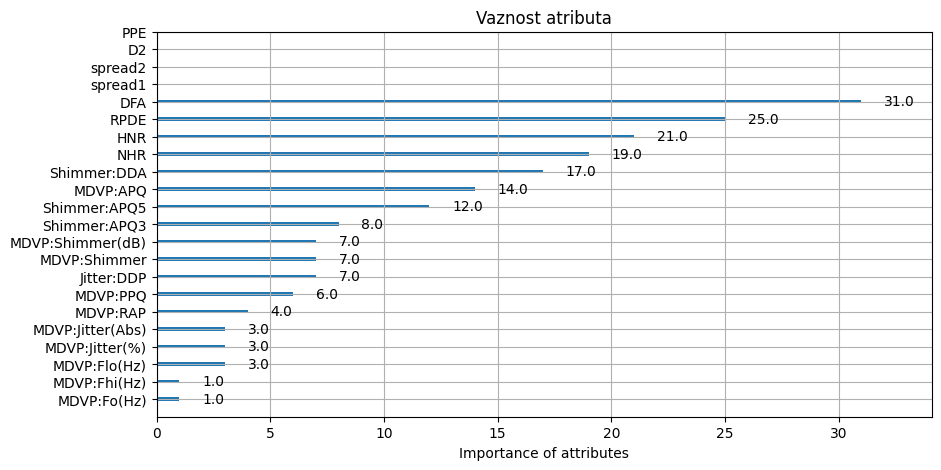

In [8]:
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
xgb.plot_importance(best_model, ax= ax, xlabel='Importance of attributes', ylabel=None, title='Vaznost atributa')
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(X.keys())
plt.show()

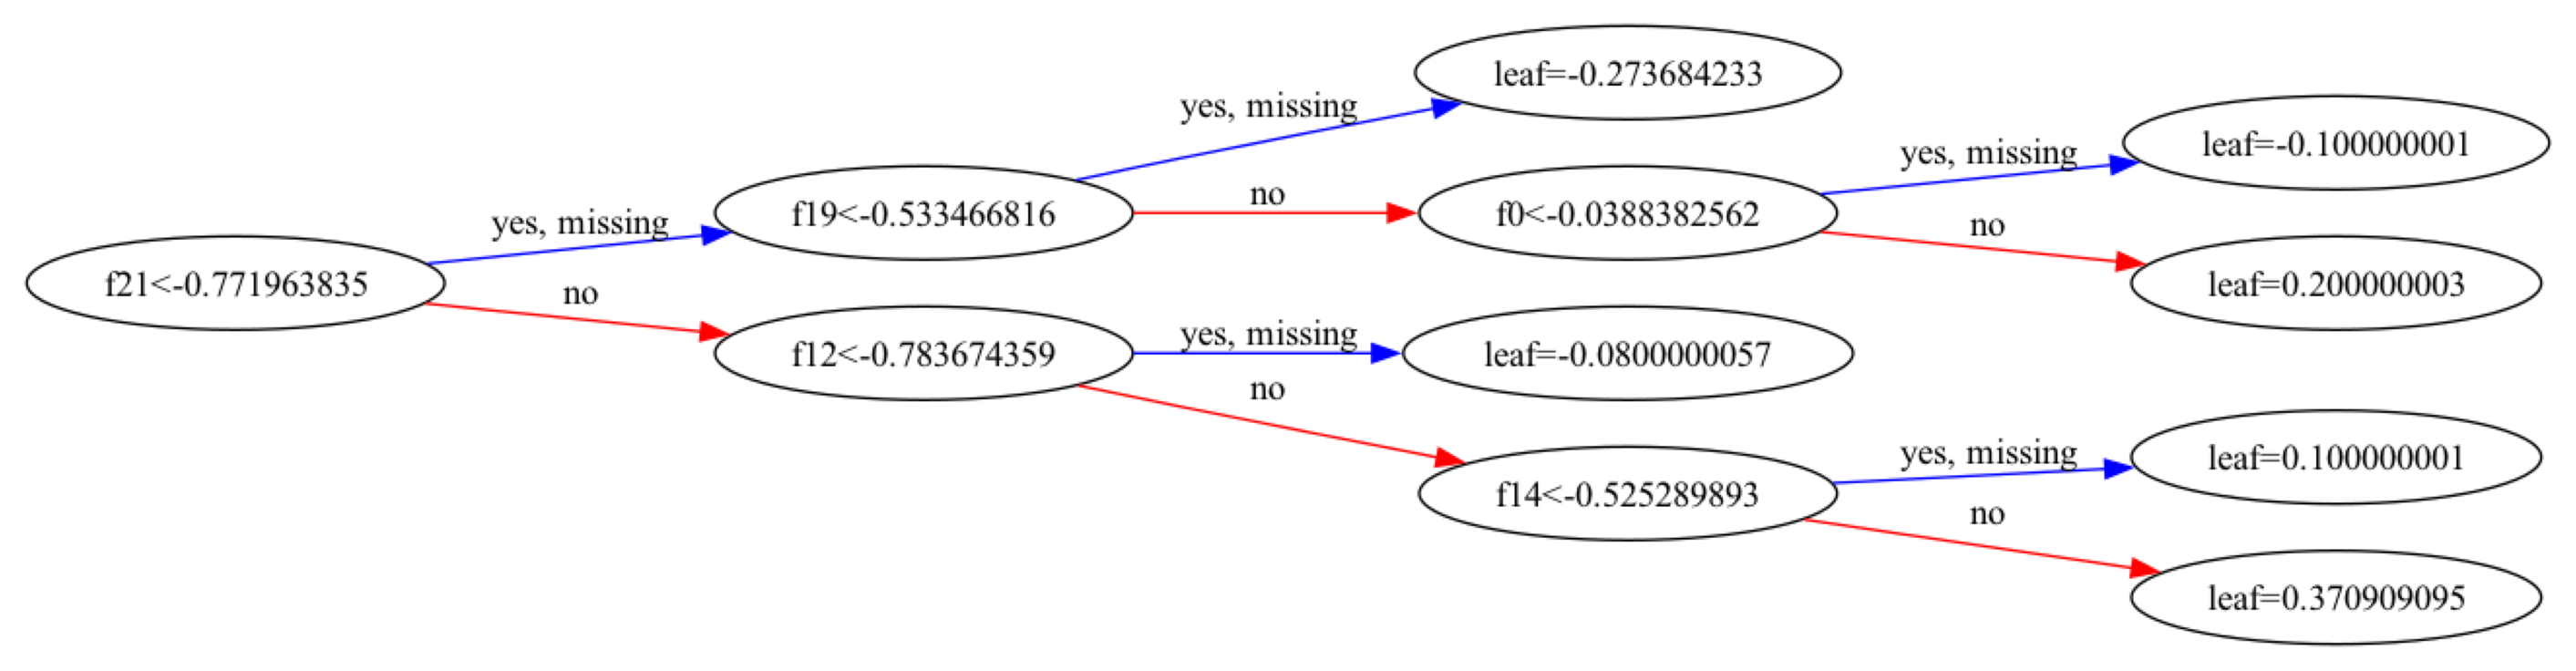

In [9]:
# Visualizing model with graphviz library

plt.figure(figsize=(20, 15), dpi=180)
ax = plt.subplot(1, 1, 1)
xgb.plot_tree(best_model, ax=ax, rankdir='LR')
plt.show()

In [10]:
# Save model
import pickle

with open('../models/xgboost.model.pickle', 'wb') as model_file:
    pickle.dump(best_model, model_file)
    
with open('../models/xgboost.scaler.pickle', 'wb') as model_file:
    pickle.dump(scaler, model_file)